In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%%matplotlib inline

UsageError: Line magic function `%%matplotlib` not found.


In [2]:
from sklearn.datasets import load_breast_cancer

In [8]:
cancer_data = load_breast_cancer()

In [11]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
df = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)

In [16]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
df.shape

(569, 30)

In [35]:
y = pd.DataFrame(cancer_data.target)

In [36]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [37]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [40]:
scaled_df = scaler.transform(df)

In [44]:
scaled_df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=2)

In [47]:
pca.fit(scaled_df)

PCA(n_components=2)

In [49]:
transformed = pca.transform(scaled_df)

In [52]:
print("Before applying pca ", scaled_df.shape)
print("After applying pca ", transformed.shape)

Before applying pca  (569, 30)
After applying pca  (569, 2)


In [59]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [63]:
plt.scatterplot(transformed, y)
# transformed[:,0]

array([ 9.19283683,  2.3878018 ,  5.73389628,  7.1229532 ,  3.93530207,
        2.38024715,  2.23888331,  2.1432985 ,  3.17492429,  6.35174679,
       -0.81041377,  2.65110048,  8.18503446,  0.34212591,  4.34237919,
        4.07565618,  0.23005502,  4.41801092,  4.94870355, -1.23706336,
       -1.57816123, -3.55733637,  4.73321079,  4.20852421,  4.94963207,
        7.09856285,  3.5102626 ,  3.06405389,  4.00726414,  1.71530973,
        6.05944551,  2.9022361 ,  4.55478269,  4.99060272,  2.98534079,
        2.76636916,  1.29619877, -3.7493134 , -0.9980689 ,  0.76526412,
       -2.15095347, -0.09333139,  9.08799968,  0.99045377, -0.29354655,
        5.38094041, -4.58193667,  1.70000689, -2.13644528, -1.567479  ,
       -3.54290556, -3.15781405, -3.45048854,  3.30255095, -0.67461929,
       -2.85815844,  4.64873887,  2.17686288, -3.72145899, -4.13596294,
       -2.38583566, -2.57888325,  4.75911215, -2.31413225,  1.69160792,
        1.81230541, -2.78592476, -3.51864834,  4.33000265, -3.26

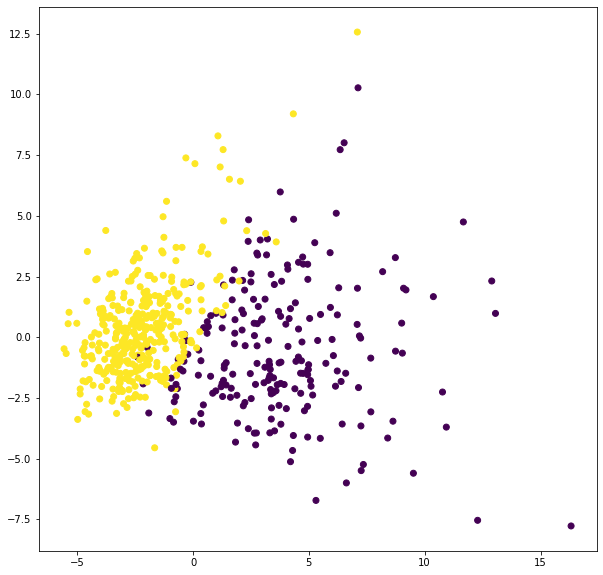

In [71]:
plt.figure(figsize=(10,10))
plt.scatter(transformed[:,0], transformed[:,1], s=None, c=cancer_data.target)